In [1]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [2]:
#Import the libraries
import math
import datetime
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Get the stock quote
df=web.DataReader('9904.TW', data_source='yahoo', start='2012-01-01', end=str(datetime.date.today()))
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,24.799999,24.250000,24.799999,24.400000,7926000.0,16.640268
2012-01-03,25.000000,24.299999,24.650000,25.000000,15656000.0,17.049456
2012-01-04,25.200001,25.000000,25.100000,25.150000,18415000.0,17.151754
2012-01-05,25.350000,25.100000,25.150000,25.299999,18543000.0,17.254049
2012-01-06,25.450001,25.049999,25.299999,25.450001,3842000.0,17.356346
...,...,...,...,...,...,...
2021-01-18,29.200001,28.350000,29.200001,29.200001,8319710.0,29.200001
2021-01-19,29.500000,29.049999,29.200001,29.100000,7034796.0,29.100000
2021-01-20,29.200001,28.000000,29.049999,28.250000,17517965.0,28.250000


In [4]:
#Get the number of rows and columns in the data set
df.shape

(2219, 6)

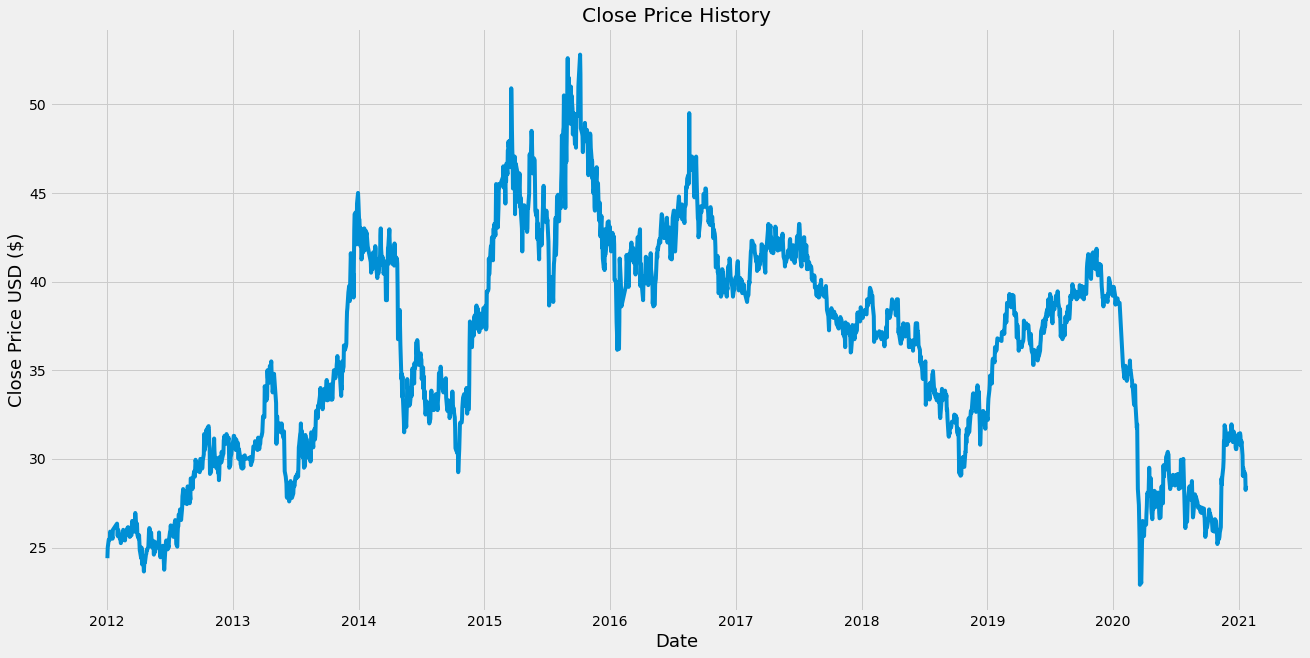

In [5]:
#Visualize the closing price hitosry
plt.figure(figsize=(20,10))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
#Create a new dataframe with only the 'Close' column
data = df.filter(items=['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows
training_data_len = math.ceil(len(dataset)* .8)  #Why is it multiplied by 0.8?

training_data_len

1776

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.05016722],
       [0.07023413],
       [0.07525084],
       ...,
       [0.17892978],
       [0.18561877],
       [0.18729099]])

In [8]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.05016722, 0.07023413, 0.07525084, 0.08026755, 0.08528432,
       0.08528432, 0.10033445, 0.09866223, 0.09531774, 0.09698996,
       0.09030103, 0.08695654, 0.10367894, 0.11538464, 0.10200673,
       0.09197325, 0.10367894, 0.10200673, 0.09364552, 0.08695654,
       0.09197325, 0.08528432, 0.07859533, 0.08528432, 0.08528432,
       0.08528432, 0.08695654, 0.10367894, 0.09531774, 0.08862875,
       0.08361204, 0.09030103, 0.09197325, 0.10702344, 0.10033445,
       0.10869565, 0.09866223, 0.10033445, 0.09030103, 0.09698996,
       0.09197325, 0.09364552, 0.11036793, 0.12040135, 0.12040135,
       0.11204015, 0.10367894, 0.10033445, 0.10033445, 0.11371236,
       0.13545155, 0.10702344, 0.10702344, 0.11538464, 0.09531774,
       0.09197325, 0.08695654, 0.09364552, 0.06521742, 0.06187292])]
[0.05016722472031021]

[array([0.05016722, 0.07023413, 0.07525084, 0.08026755, 0.08528432,
       0.08528432, 0.10033445, 0.09866223, 0.09531774, 0.09698996,
       0.09030103, 0.08695654, 0.10

In [9]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1716, 60, 1)

In [11]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
1716/1716 [==============================] - 29s 16ms/step - loss: 0.0090
Epoch 2/3
1716/1716 [==============================] - 28s 16ms/step - loss: 0.0016
Epoch 3/3
1716/1716 [==============================] - 30s 17ms/step - loss: 0.0013


In [14]:
#Create the testing data set
#Create a new array containing scaled values from index 1764 to 2279
test_data = scaled_data[training_data_len - 60: , :]

#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [15]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [16]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2 )
rmse

0.20053385611850574

/Users/charleschen/opt/anaconda3/envs/Python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


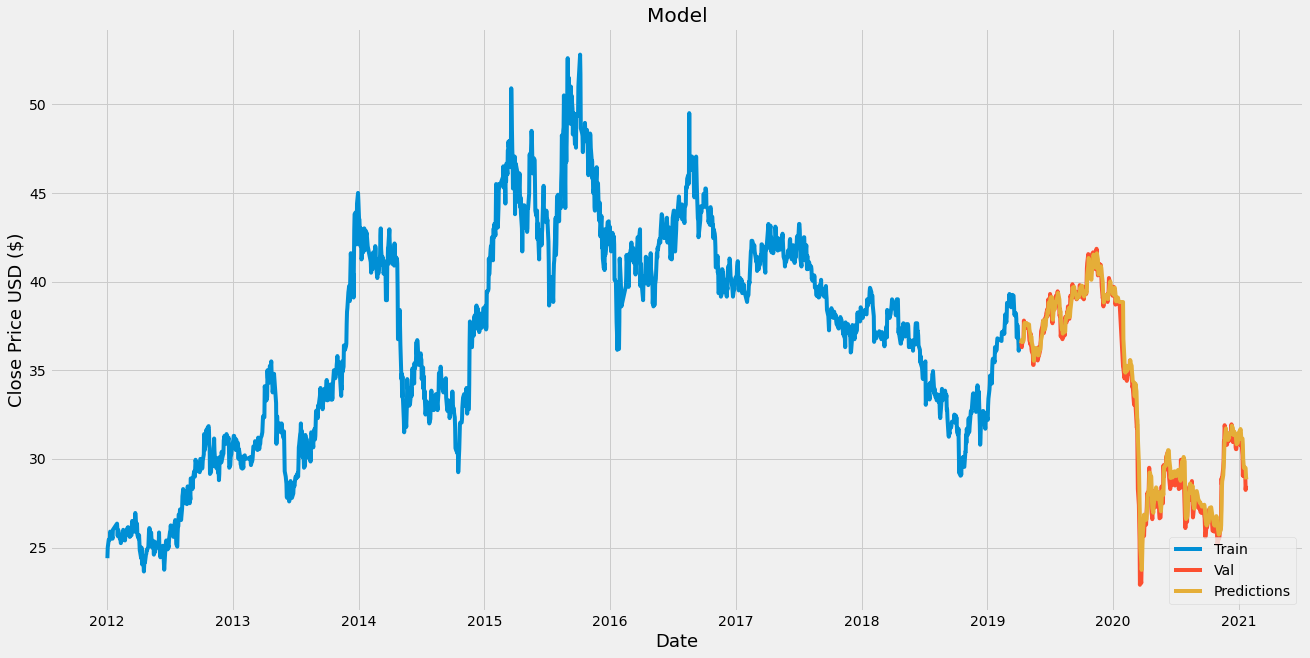

In [19]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [20]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-04-09,36.599998,36.522835
2019-04-10,36.500000,36.681530
2019-04-11,36.299999,36.710064
2019-04-12,36.500000,36.589554
2019-04-15,36.650002,36.626648
...,...,...
2021-01-18,29.200001,29.499617
2021-01-19,29.100000,29.510281
2021-01-20,28.250000,29.475883


In [21]:
#Get the quote
apple_quote = web.DataReader('9904.TW', data_source='yahoo', start = '2012-01-01', end = str(datetime.date.today()))
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

#Store the predicted price values in a list
pred_price_list = []
pred_price_list.append(pred_price)

[[28.804129]]


In [22]:
#Get the last 59 day closing price values and convert the dataframe to an array and add up a predicted price
last_59_days = new_df[-60+1:].values
last_60_days = []
for i in range(59):
    last_60_days.append(last_59_days[i,0])
last_60_days.append(float(pred_price))
last_60_days = np.array(last_60_days).reshape((60,1))

#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test2 = []
#Append the past 60 days
X_test2.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test2 = np.array(X_test2)
#Reshape the data
X_test2 = np.reshape(X_test2, (X_test2.shape[0], X_test2.shape[1], 1))
#Get the predicted scaled price
pred_price2 = model.predict(X_test2)
#Undo the scaling
pred_price2 = scaler.inverse_transform(pred_price2)
print(pred_price2)

[[28.957863]]
